# Project: Wrangle and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#analysis">Data Analysis</a></li>
<li><a href="#insights">Insights</a></li>
</ul>

<a id='intro'></a>
## Introduction

Within this porject data from the WeRateDogs Twitter account will be cleaned, analyzed and interesting aspects will be visualized.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import json
import tweepy

<a id='wrangling'></a>
## Data Wrangling
Subsequently Data Wrangling is performed for the project data. Goal is to generate a basic understanding of the data and bringing it into a state from which further analysis can be conducted.

### a. Gather
First step is to access the process data, so the dataset with the project data is generated from a csv-file.

#### I. Downloaded csv-file

In [2]:
# Create dataframe df1 from downloaded csv-file
df1 = pd.read_csv('twitter-archive-enhanced.csv')

#### II: Programmatical download from provided URL

In [3]:
# Create new folder named 'twitter' if it doesn't exist yet
folder_name = 'twitter'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Request file via specified URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save file in created folder
with open(os.path.join(folder_name, url.split('/')[7]), mode='wb') as file:
    file.write(response.content)

In [4]:
# Create dataframe df2 from downloaded csv-file
df2 = pd.read_csv('twitter/image-predictions.tsv', sep = '\t')

#### III: Scraping additional data from twitter API

In [5]:
# Authentification process
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# Make sure that when requesting data via tweepy API Rate limit isn't exceeded
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# Create list with 'tweet_IDs' from df1 in order to search for via tweepy API
id_list = df1['tweet_id'].copy().tolist()

In [7]:
# Request additional data 'tweet_text', 'favourite_count' and 'retweet_count' via API
df_list = []
exceptions_list = []

for tweet_id in id_list:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        # Create json str from tweepy.models.Status
        json_str = json.dumps(tweet._json)
        # Create json from json_str
        json_file = json.loads(json_str)

        # Extract data from json
        tweet_favc = json_file['favorite_count']
        retw_count = json_file['retweet_count']
        
        # Append data to df_list
        df_list.append({'tweet_id':tweet_id,
                       'favourite_count':tweet_favc,
                       'retweet_count':retw_count})
    # If exception write 'tweet_id' into exceptions_list
    except Exception as e:
        exceptions_list.append(tweet_id)

# Create df3 from df_list        
df3 = pd.DataFrame(df_list, columns = ['tweet_id', 'favourite_count', 'retweet_count'])

#### IV. Joining df1 and df3 to one single dataframe df1

In [8]:
df1 = df1.join(df3.set_index('tweet_id'), on = 'tweet_id')

### b. Assess
In order to sufficiently understand the project data, the shape, rows and columens as well as the datatypes and mean values are examined.

#### I. Visual assessment of df1 and df2

In [468]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favourite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,36349.0,7735.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,31319.0,5727.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,23594.0,3789.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,39658.0,7901.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,37853.0,8519.0


In [469]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### II. Programmatic assessment of df1

In [9]:
# General information about columns, rows, datatypes and null-values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Checking datatypes of object columns
labels_obj = ['timestamp', 'source', 'text', 'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo','floofer','pupper', 'puppo']

for c in labels_obj:
    print(c, ':', type(df1[c][0]))

timestamp : <class 'str'>
source : <class 'str'>
text : <class 'str'>
retweeted_status_timestamp : <class 'float'>
expanded_urls : <class 'str'>
name : <class 'str'>
doggo : <class 'str'>
floofer : <class 'str'>
pupper : <class 'str'>
puppo : <class 'str'>


In [11]:
# Examining a random sample from df1
df1.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favourite_count,retweet_count
1537,689877686181715968,NaN,NaN,2016-01-20 18:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Durg. He's trying to conquer his fear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689877686...,9,10,Durg,None,None,None,None,3042.0,1163.0


In [12]:
# Examining column 'rating_numerator' with quantitative data
df1.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [13]:
# Examining column 'rating_denominator' with quantitative data
df1.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [14]:
# Examining column 'favourite_countr' with quantitative data
df1.favourite_count.describe()

count      2331.000000
mean       7592.956242
std       11781.585566
min           0.000000
25%        1324.500000
50%        3305.000000
75%        9301.500000
max      156910.000000
Name: favourite_count, dtype: float64

In [15]:
# Examining column 'retweet_count' with quantitative data
df1.retweet_count.describe()

count     2331.000000
mean      2715.572287
std       4593.204079
min          1.000000
25%        548.500000
50%       1275.000000
75%       3155.000000
max      78190.000000
Name: retweet_count, dtype: float64

In [16]:
# Checking for duplicated tweet_ids in df1
df1.tweet_id.duplicated().sum()

0

#### III. Programmatic assessment of df2

In [17]:
# General information about columns, rows, datatypes and null-values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [18]:
# Checking datatypes of object columns
labels_obj = ['jpg_url', 'p1', 'p2', 'p3']

for c in labels_obj:
    print(c, ':', type(df2[c][0]))

jpg_url : <class 'str'>
p1 : <class 'str'>
p2 : <class 'str'>
p3 : <class 'str'>


In [19]:
# Examining a random sample from df2
df2.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1062,715220193576927233,https://pbs.twimg.com/media/Cez49UqWsAIRQXc.jpg,1,Chihuahua,0.584026,True,Italian_greyhound,0.377077,True,Boston_bull,0.0174,True


In [20]:
# Checking value counts for column 'img_num'
df2.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [21]:
# Checking for duplicated tweet_ids in df2
df2.tweet_id.duplicated().sum()

0

#### Differentiation of dataframes
- **df1** - Basic information about the tweets
- **df2** - Information regarding the prediction of dog breeds
- **df3** - Information regarding dog name, type and rating

#### Tidiness of data
##### `df1` 
- There are retweets in df1 while they shouldn't be occurring in df1 -> **Remove retweet rows**
- Columns 'retweeted_status_user_id' and 'retweeted_status_timestamp' don't fit to type of obervational unit int df1 -> **Remove retweet columns**
- Columns 'in_reply_to_status_id' and 'in_reply_to_user_id' don't fit to type of observational unit -> **Remove columns**
- Columns 'doggo', 'floofer', ' doggo', 'pupper', 'puppo' not understandable for reader -> **Join columns in one single column 'type'**
- Columns 'name', 'type', 'rating_numerator' and 'rating_denominator' don't fit to type of observational unit -> **Move columns to df3**

#### `df2`:
- Column label names 'img_num' and  'jpg_url' hard to understand for reader -> **Change label names**
- Columns 'jpg_url' and 'img_num' in df2 hold information regarding type of observational unit from df1 -> **Move columns to df1**


#### Quality

##### `df1`, `df2`, `df3`
- 1, Remove rows with missing values from the dataframes

##### `df1`:
- 2, Change 'favourite_count' from float to int
- 3, Change 'retweet_count' from float to int
- 4, Change 'timestamp' to datatype Datetime
- 5, Change 'img_num' to int
- 6, Correct entries in 'source' column to 'http://twitter.com'

##### `df3`:
- 7, Remove row with unrealistic max values in column 'rating_numerator
- 8, Change unrealistic max value in column 'rating_denominator' to 10

### c. Clean
In the Cleaning phase potential problemns in the provided dataset are idtentified and subsequently solved. The data is brought into a state from which further analysis can be conducted.





In [315]:
df1_clean = df1.copy()
df2_clean = df2.copy()

####  I. Tidiness of data

##### Define
`df1`
- 1, Remove retweet rows and subsequently delete columns regarding retweets from df1_clean
- 2, Remove 'in_reply_to_status_id' and 'in_reply_to_user_id' from df1_clean
- 3, Reorganize columns 'doggo', 'floofer', 'doggo', 'pupper' and 'puppo' in single column 'type'
- 4, Create new dataframe df3 with columns 'name', 'type', 'rating_numerator' and 'rating_denominator' and remove columns from df1_clean

`df2`
- 5, Place columns 'jpg_url' and 'img_num' in df1_clean,  eliminate them from df2_clean and change label names

##### Code

1, Remove retweet rows and subsequently delete columns regarding retweets from df1_clean

In [316]:
# Remove the retweet rows from df1_clean
df1_clean = df1_clean.query('retweeted_status_id.isnull() == True')

# Delete the columns regarding retweets in df1_clean
df1_clean.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

2. Remove 'in_reply_to_status_id' and 'in_reply_to_user_id' from df1_clean

In [317]:
# 2, Remove columns 'in_reply_to_status_id' and 'in_reply_to_user_id' from df1_clean
df1_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

3. Reorganize columns 'doggo', 'floofer', 'doggo', 'pupper' and 'puppo' in single column 'type'

In [318]:
# Make sure there are no overlapping entries in columns doggo, floofer, pupper, puppo
labels_list = ['doggo', 'floofer', 'pupper', 'puppo']
check = []

for c in labels_list:
    df_check = df1_clean.query('{} == "{}"'.format(c,c))
    list_check = labels_list.copy()
    list_check.remove(c)
    for d in list_check:
        check.append(df_check[d].isnull().count() == df_check[c].count())

# No overlaping entries in any of the columns?
check

[True, True, True, True, True, True, True, True, True, True, True, True]

In [319]:
# Replace None with NaNs in df1_clean
labels = ['doggo', 'floofer', 'pupper','puppo']

for c in labels:
    df1_clean[c] = df1_clean[c].replace('None', np.nan)

In [320]:
# Combine columns 'doggo', 'floofer', 'pupper' and 'puppo' in column 'doggo'
df1_clean['doggo'] = df1_clean.loc[:,'doggo':'puppo'].fillna(method='ffill',axis=1)['puppo']

In [321]:
# Remove redundant columns 'floofer', 'pupper' and 'puppo'
df1_clean.drop(['floofer', 'pupper', 'puppo'], axis=1, inplace=True)

# Rename column 'doggo' to 'type'
df1_clean = df1_clean.rename(columns={'doggo':'type'})

# Replace NaNs with 'None' in columns 'type'
df1_clean['type'] = df1_clean['type'].replace(np.nan, 'None')

4. Create new dataframe df3 with columns 'name', 'type', 'rating_numerator' and 'rating_denominator' and remove columns from df1_clean

In [324]:
# Create new dataframe df3
df3_clean = df1_clean.copy()

In [327]:
# Remove all columns from df3 except for 'tweet_id', 'rating_numerator', 'rating_denominator', 'name', 'type'
df3_clean.drop(['timestamp','source', 'text', 'expanded_urls', 'favourite_count', 
                'retweet_count', 'image_url', 'number_of_images'], axis=1, inplace=True)

In [329]:
# Remove columns 'rating_numerator', 'rating_denominator', 'name', 'type' from df1
df1_clean.drop(['rating_numerator', 'rating_denominator', 'name', 'type'], axis=1, inplace=True)

5. Place columns 'jpg_url' and 'img_num' in df1_clean,  eliminate them from df2_clean and change label names

In [322]:
# Join columns 'jpg_url' and 'img_num' from df2_clean with df1_clean
df1_clean = df1_clean.join(df2_clean.set_index('tweet_id'), on='tweet_id')

# Remove columns joined from df2_clean except for 'jpg_url' and 'img_num'
df1_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

# Remove columns 'img_num' and 'jpg_url' from df2_clean
df2_clean.drop(['img_num','jpg_url'], axis=1, inplace=True)

In [323]:
# Rename columns 'img_num' and 'jpg_url'
df1_clean = df1_clean.rename(columns={'img_num':'number_of_images', 'jpg_url':'image_url'})

##### Check

In [331]:
# Visual check of changes in df1_clean
df1_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,favourite_count,retweet_count,image_url,number_of_images
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,36349.0,7735.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0


In [278]:
# Visual check of changes in df2_clean
df2_clean.head(1)

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [332]:
# Visual check of changes in df3_clean
df3_clean.head(1)

,tweet_id,rating_numerator,rating_denominator,name,type
0,892420643555336193,13,10,Phineas,None


#### II. Quality of data

##### Define
- 1, Remove rows with missing values from the dataframes
- 2, Change 'favourite_count' from float to int
- 3, Change 'retweet_count' from float to int
- 4, Change 'timestamp' to datatype Datetime
- 5, Change 'img_num' to int
- 6, Correct entries in 'source' column to 'http://twitter.com'
- 7, Delete row with unrealistic max values in column 'rating_numerator'
- 8, Change unrealistic max value (170) in column 'rating_denominator' to 10

##### Code
1. Remove rows with missing values from the dataframes

In [341]:
# Drop all rows with null values
df1_clean.dropna(inplace = True)
df2_clean.dropna(inplace = True)
df3_clean.dropna(inplace = True)

2. Change 'favourite_count' from float to int 3. Change 'retweet_count' from float to int 4. Change 'timestamp' to datatype Datetime 5. Change 'img_num' to int

In [343]:
df1_clean['favourite_count'] = df1_clean.favourite_count.astype(int)
df1_clean['retweet_count'] = df1_clean.retweet_count.astype(int)
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])
df1_clean['number_of_images'] = df1_clean.number_of_images.astype(int)

6. Correct entries in 'source' column to 'http://twitter.com'

In [344]:
# Change entries in column 'source'
df1_clean['source'] = 'http://twitter.com'

7. Delete row with unrealistic max values in column 'rating_numerator'

In [345]:
# Detect and remove rows with unrealistic numerator (>20)
while df3_clean.rating_numerator.max() > 20:
    max_value_index = df3_clean.loc[df3_clean['rating_numerator'] == df3_clean.rating_numerator.max()].index[0]
    df3_clean.drop(max_value_index, inplace = True)

8. Change unrealistic max values in column 'rating_denominator' to 10

In [346]:
# Check for how many rows denominator isn't 10
df3_clean.query('rating_denominator != 10').shape

(7, 5)

In [347]:
# Change denomiator of all rows to 10
df3_clean['rating_denominator'] = 10

##### Check

In [348]:
# Check datatypes of columns in df1_clean visually
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1987 non-null   int64              
 1   timestamp         1987 non-null   datetime64[ns, UTC]
 2   source            1987 non-null   object             
 3   text              1987 non-null   object             
 4   expanded_urls     1987 non-null   object             
 5   favourite_count   1987 non-null   int32              
 6   retweet_count     1987 non-null   int32              
 7   image_url         1987 non-null   object             
 8   number_of_images  1987 non-null   int32              
dtypes: datetime64[ns, UTC](1), int32(3), int64(1), object(4)
memory usage: 100.9+ KB


In [349]:
# Check datatypes of columns in df2_clean visually
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   p1        2075 non-null   object 
 2   p1_conf   2075 non-null   float64
 3   p1_dog    2075 non-null   bool   
 4   p2        2075 non-null   object 
 5   p2_conf   2075 non-null   float64
 6   p2_dog    2075 non-null   bool   
 7   p3        2075 non-null   object 
 8   p3_conf   2075 non-null   float64
 9   p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(3)
memory usage: 111.5+ KB


In [350]:
# Check datatypes of columns in df2_clean visually
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2152 non-null   int64 
 1   rating_numerator    2152 non-null   int64 
 2   rating_denominator  2152 non-null   int64 
 3   name                2152 non-null   object
 4   type                2152 non-null   object
dtypes: int64(3), object(2)
memory usage: 84.1+ KB


In [351]:
# No more unrealistic values in df3_clean columns 'rating_numerator' and 'rating_denominator'?
if df3_clean.rating_numerator.max() <= 20 and df3_clean.rating_denominator.max() == 10:
    print(True)
else:
    print(False)

True


#### III. Aditional changes
- Restructure columns in df1_clean and df3_clean to impove readability
- Reset indices in df1_clean, df2_clean and and df3_clean

In [355]:
# Restructure columns in df1
df1_clean = df1_clean[['tweet_id', 'timestamp', 'text', 'favourite_count', 'retweet_count', 'number_of_images', 'source', 
                       'expanded_urls', 'image_url']]

In [356]:
# Restructure columns in df3
df3_clean = df3_clean[['tweet_id', 'name', 'type', 'rating_numerator', 'rating_denominator']]

In [358]:
# Reset indices in dataframes
df1_clean.reset_index(drop=True)
df2_clean.reset_index(drop=True)
df3_clean.reset_index(drop=True)

,tweet_id,name,type,rating_numerator,rating_denominator
0,892420643555336193,Phineas,None,13,10
1,892177421306343426,Tilly,None,13,10
2,891815181378084864,Archie,None,12,10
3,891689557279858688,Darla,None,13,10
4,891327558926688256,Franklin,None,12,10
...,...,...,...,...,...
2147,666049248165822465,None,None,5,10
2148,666044226329800704,a,None,6,10
2149,666033412701032449,a,None,9,10
2150,666029285002620928,a,None,7,10


#### III. Saving as csv file
- Dataframe df1_clean gets stored as csv named 'twitter_archive_master.csv'
- Dataframes df2_clean and df3_clean are stored csv named 'twitter_archive_predictions' and 'twitter_archive_dog_ratings'

In [466]:
# Save dataframes as csv
df1_clean.to_csv('twitter_archive_master.csv')
df2_clean.to_csv('twitter_archive_predictions.csv')
df3_clean.to_csv('twitter_archive_dog_ratings.csv')

<a id='analysis'></a>
## Data Analysis
Subsequently general patterns in the data are detected and relationships in the data are visualized.

#### I. Dataframe `df1`

In [407]:
# Checking values in column 'retweet_count'
df1_clean.retweet_count.describe()

count     1987.000000
mean      2466.360342
std       4413.594760
min         11.000000
25%        552.000000
50%       1193.000000
75%       2801.500000
max      78190.000000
Name: retweet_count, dtype: float64

In [408]:
# Checking values in column 'favourite_count'
df1_clean.favourite_count.describe()

count      1987.000000
mean       8308.495219
std       12226.123511
min          72.000000
25%        1786.500000
50%        3762.000000
75%       10328.000000
max      156910.000000
Name: favourite_count, dtype: float64

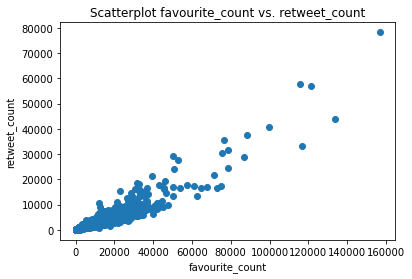

In [413]:
# Creating scatterplot from 'favourite_count' and 'retweet_count'
plt.scatter(df1_clean['favourite_count'], df1_clean['retweet_count'])
plt.title('Scatterplot favourite_count vs. retweet_count')
plt.xlabel('favourite_count')
plt.ylabel('retweet_count');

#### I. Dataframe `df3`

In [451]:
# Dog with frequency >10 in the dataset
n = 10
names_list = []
names_list = df3_clean['name'].value_counts()[:n].index.tolist()
print(names_list)

['None', 'a', 'Lucy', 'Charlie', 'Cooper', 'Oliver', 'Penny', 'Tucker', 'the', 'Sadie']


In [452]:
# Removal of Noname and names occurring due to typing errors or similar
typing_errors = ['None', 'a', 'the']

for c in typing_errors:
    names_list.remove(c)

In [461]:
# Frequency of dog names in df3_clean
names_count = []
for c in names_list:
    names_count.append(df3_clean.query('name == "{}"'.format(c)).tweet_id.count())
print(names_count)

[11, 11, 10, 10, 9, 9, 8]


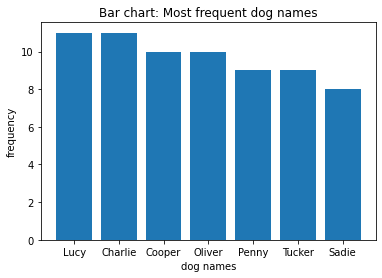

In [462]:
plt.bar(names_list, names_count)
plt.title('Bar chart: Most frequent dog names')
plt.xlabel('dog names')
plt.ylabel('frequency');

In [383]:
# Creating new column 'rating' ind df3_clean
df3_clean['rating'] = df3_clean['rating_numerator']/df3_clean['rating_denominator']

In [460]:
# Calculating mean ratings for dog types from dataset
dog_types = ['doggo', 'pupper', 'puppo', 'floofer', 'None']
dog_mean_ratings = []

for c in dog_types:
    dog_mean_ratings.append(df3_clean.query('type == "{}"'.format(c)).rating.mean())
print(dog_mean_ratings)

[1.1853333333333331, 1.0751072961373391, 1.2080000000000002, 1.18, 1.0517412935323383]


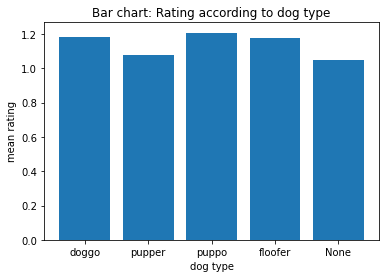

In [467]:
# Creating bar chart with dog types and mean ratings
plt.bar(dog_types, dog_mean_ratings)
plt.title('Bar chart: Rating according to dog type')
plt.xlabel('dog type')
plt.ylabel('mean rating');

<a id='insights'></a>
## Insights

**I. Positive corelation between 'favourite_count' and retweet_count':** In WeRateDogs dataset there is a possitive correlation between 'favourite_count' and retweet_count' which signifies that as a tweet with increasing number of likes (favourites) als gets retweeted more frequently.

**II. Most frequent dog names:** The most frequent dog names in the WeRateDogs tweets which (typing error caused names and 'none excluded) are 'Lucy', 'Charlie', 'Cooper', 'Oliver', 'Penny', 'Tucker', and 'Sadie'. Every one of those names occurred at least 10 times in the dataset.

**III. Highest rated dog type:** WeRate dog categorizes dogs according to specific categories. Those are 'doggo', 'pupper', 'puppo' and 'floofer'. In the dataset the type 'puppo' is in average the highest rated dog type with a mean rating of 1.21 (about 12/10).